# **High ice cloud fraction from CALIPSO GEWEX cloud product**
Adam Sokol (adambsokol@gmail.com) <br>
April 24, 2023 <br>

Notebook for making Fig. 1 of Gasparini et al. (2023) ACP Opinion piece on tropical cirrus.

Home page for the CALIPSO GEWEX cloud product: https://www-calipso.larc.nasa.gov/resources/calipso_users_guide/data_summaries/l3/cal_lid_l3_gewex_cloud_v1-00_desc.php

In [1]:
# imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.ndimage.filters import gaussian_filter


### Read in data
The file used here is the 2007-2015 climatology, found by averaging the individual monthly mean files retrieved from the CALIPSO data arhive.

In [3]:
data_dir = './'
fname = 'CAL_LID_L3_GEWEX_Cloud-Standard-V1-00_Mean_2007-2015.nc'

ds = xr.open_dataset('{}{}'.format(data_dir, fname))

ds

<xarray.Dataset>
Dimensions:                            (lon: 360, lat: 160)
Coordinates:
  * lon                                (lon) float32 -179.5 -178.5 ... 179.5
  * lat                                (lat) float32 -79.5 -78.5 ... 78.5 79.5
Data variables:
    High_Ice_Cloud_Amount_Mean_Column  (lat, lon) float64 ...
Attributes:
    description:  2007-2015 mean high ice cloud fraction from the CALISPO Lev...
    author:       Adam Sokol (adambsokol@gmail.com)
    date:         2023-04-24

### Gaussian smoothing

In [4]:
filter_sigma = 1 # higher number for greater smoothing

# apply filter
f_smooth = gaussian_filter(ds.High_Ice_Cloud_Amount_Mean_Column.values, sigma=filter_sigma)

# add as variable in dataset
ds['f_smooth'] = (('lat', 'lon'), f_smooth)


### Map of high cloud fraction

Text(0.5, 1.0, 'High Ice Cloud Fraction')

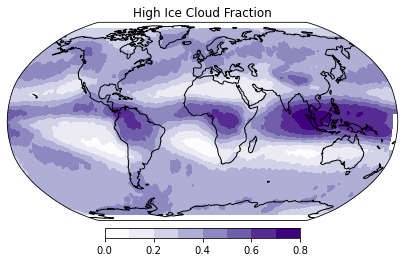

In [5]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
    
pc = ds.f_smooth.plot.contourf(
        levels=np.arange(0,0.9,0.1), # contour levels
        cmap='Purples', 
        vmin=-0.1, vmax=0.8, # max/min color value
        transform=ccrs.PlateCarree(), 
        add_colorbar=False, 
)

for c in pc.collections: # removes artifacts when saving as PDF
    c.set_edgecolor('face')
    
ax.coastlines(color='k', lw=1, alpha=1)

cb = fig.colorbar(pc, orientation='horizontal', shrink=0.5, pad=0.02)
cb.set_ticks(np.arange(0,1.0,0.2))

plt.title('High Ice Cloud Fraction', fontsize=12)

   
#plt.savefig('high_ice_fraction_CAL_GEWEX_2007-2015.pdf', bbox_inches='tight')